In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [6]:
data = pd.read_excel('/Users/21car/Downloads/Survey 24.xlsx')

In [7]:
data.dropna(inplace=True)

C:\Users\21car\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


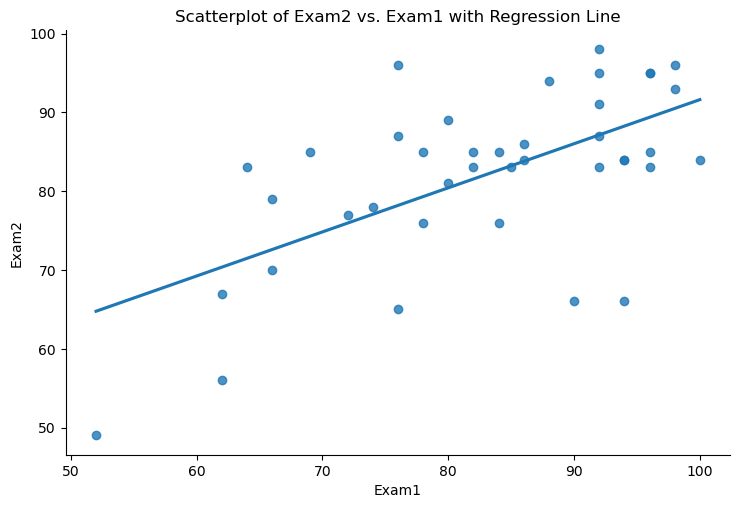

                            OLS Regression Results                            
Dep. Variable:                  Exam2   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     22.78
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.69e-05
Time:                        13:28:16   Log-Likelihood:                -142.86
No. Observations:                  40   AIC:                             289.7
Df Residuals:                      38   BIC:                             293.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6738      9.826      3.630      0.0

In [8]:
sns.lmplot(x='Exam1', y='Exam2', data=data, aspect=1.5, ci=None)
plt.title('Scatterplot of Exam2 vs. Exam1 with Regression Line')
plt.show()

# Regression Analysis
X = sm.add_constant(data['Exam1'])  # adding a constant
model = sm.OLS(data['Exam2'], X).fit()
print(model.summary())

In [9]:
credit_hours_mapping = {
    "Less than 12": 1,
    "12-15": 2,
    "16-18": 3,
    "More than 18": 4
}

# Replace the strings in the column with integers
data['How many credit hours are you taking this semester?'] = data['How many credit hours are you taking this semester?'].replace(credit_hours_mapping)

# Verify changes
print(data['How many credit hours are you taking this semester?'].head())

KeyError: 'How many credit hours are you taking this semester?'

In [ ]:
sns.lmplot(x='How many credit hours are you taking this semester?', y='Exam2', data=data, aspect=1.5, ci=None)
plt.title('Scatterplot of Exam2 vs. Credit Hours with Regression Line')
plt.xlabel('Credit Hours (Categorized)')
plt.ylabel('Exam2 Score')
plt.show()

# Regression Analysis
X = sm.add_constant(data['How many credit hours are you taking this semester?'])  # adding a constant
model = sm.OLS(data['Exam2'], X).fit()
print(model.summary())

In [ ]:
from sklearn.model_selection import train_test_split

# Select the feature columns and the target column
features = ["Exam1", "ACT", "OGPA", "SGPA"]
target = "GradeExam2"

X = data[features]
y = data[target]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Predict using the testing set
y_pred = model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
print(data.dtypes)

In [ ]:
grade_act_avg = data.groupby("GradeExam2")["ACT"].mean().reset_index()

# Rename the columns for clarity
grade_act_avg.columns = ["GradeExam2", "Average ACT"]

# Display the table
print(grade_act_avg)

In [ ]:
max_ogpa_sgpa_by_quiz = data.groupby("Quiz Average")[["OGPA", "SGPA"]].max().reset_index()

# Rename columns for clarity (optional)
max_ogpa_sgpa_by_quiz.columns = ["Quiz Average", "Maximum OGPA", "Maximum SGPA"]

# Display the table
print(max_ogpa_sgpa_by_quiz)

In [ ]:
plt.figure(figsize=(8, 6))  # Optional, to set the figure size
sns.histplot(data["Quiz Average"], kde=True, bins=10)  # kde=True adds a Kernel Density Estimate
plt.title("Histogram of Quiz Average")
plt.xlabel("Quiz Average")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))  # Optional, setting the figure size
sns.countplot(x="Exam1", data=data, palette="Set2")  # You can change the color palette if needed
plt.title("Countplot of Exam 1 Scores")
plt.xlabel("Exam 1 Score")
plt.ylabel("Count")
plt.show()

In [ ]:
data["TotalExam"] = data["Exam1"] + data["Exam2"]

# Display the first 5 records of the updated DataFrame
print(data.head())

In [ ]:
data["Exam2+8"] = data["Exam2"] + 8

# Display the first five records of the updated DataFrame
print(data[["ID", "Exam1", "Exam2", "Exam2+8", "GradeExam2"]].head())

In [ ]:
# Function to get a list of numbers from user input
def get_valid_numbers():
    # Ask the user for 8 numbers
    numbers = []
    while len(numbers) < 8:
        # Prompt user input
        num = int(input("Enter a number (75 or above, ending in 5 or 0): "))
        
        # Check if the number is valid
        if num >= 75 and (num % 10 == 5 or num % 10 == 0):
            numbers.append(num)
        else:
            print("Invalid number. Please enter a number that is 75 or above and ends in 5 or 0.")

    return numbers

# Get a valid list of 8 numbers
valid_numbers = get_valid_numbers()

# Print the list
print("Your list of valid numbers is:", valid_numbers)

In [ ]:
# Import the Counter class from the collections module
from collections import Counter

# Your list of valid numbers
numbers = [75, 80, 85, 90, 95, 100, 90, 105]

# Use Counter to count the occurrences of each unique number
number_counts = Counter(numbers)

# Print the occurrences for each number
print("Occurrences of each number:", dict(number_counts))


In [ ]:
df.dropna(subset=['StartStudy', 'OGPA', 'SGPA'], inplace=True)

In [ ]:
# Adjust column names for clarity
pivot_table.columns = ['Max OGPA', 'Max SGPA']

# Print the updated table
print(pivot_table)

In [ ]:
print(data['StartStudy'].unique())

# Check for missing values
print(data[['StartStudy', 'OGPA', 'SGPA']].isnull().sum())

# Drop rows with any missing values in these columns
data.dropna(subset=['StartStudy', 'OGPA', 'SGPA'], inplace=True)

In [12]:
# Example of filtering for three specific responses (replace with actual responses)
filtered_data = data[data['StartStudy'].isin(['Response1', 'Response2', 'Response3'])]
pivot_table = filtered_data.pivot_table(index='StartStudy', values=['OGPA', 'SGPA'], aggfunc='max')
print(pivot_table)


Empty DataFrame
Columns: []
Index: []
